In [1]:
% matplotlib inline

from __future__ import division
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
import time as tm
import gsw as sw
from scipy.optimize import curve_fit
from scipy.stats import chi2

from scipy.stats import linregress

 

import numpy.ma as ma

from mpl_toolkits.basemap import Basemap, cm
from netCDF4 import Dataset as NetCDFFile

from matplotlib import rcParams, rc
rcParams.update({'figure.autolayout': True})
rcParams.update({'font.family': 'serif'})
rcParams.update({'font.serif': 'Times New Roman'})
#rc('text', usetex=True)

In [2]:
# set data directory 
indir = r'../data/'

infile = r'%snewmapping.csv' % indir
env = pd.read_csv(infile, sep = ',')

print env.columns
env['rho'] = sw.rho(env['S'], env['T'],0)

infile = '%sphi_data.csv' % indir
phi = pd.read_csv(infile, sep = ',')

# print phi['sample'], env['sample']


Index([u'id', u'sample', u'lat', u'lon', u'T', u'S', u'CTD cast', u'Station',
       u'depth', u'eddy', u'nitrate', u'phosphate', u'silicic acid'],
      dtype='object')


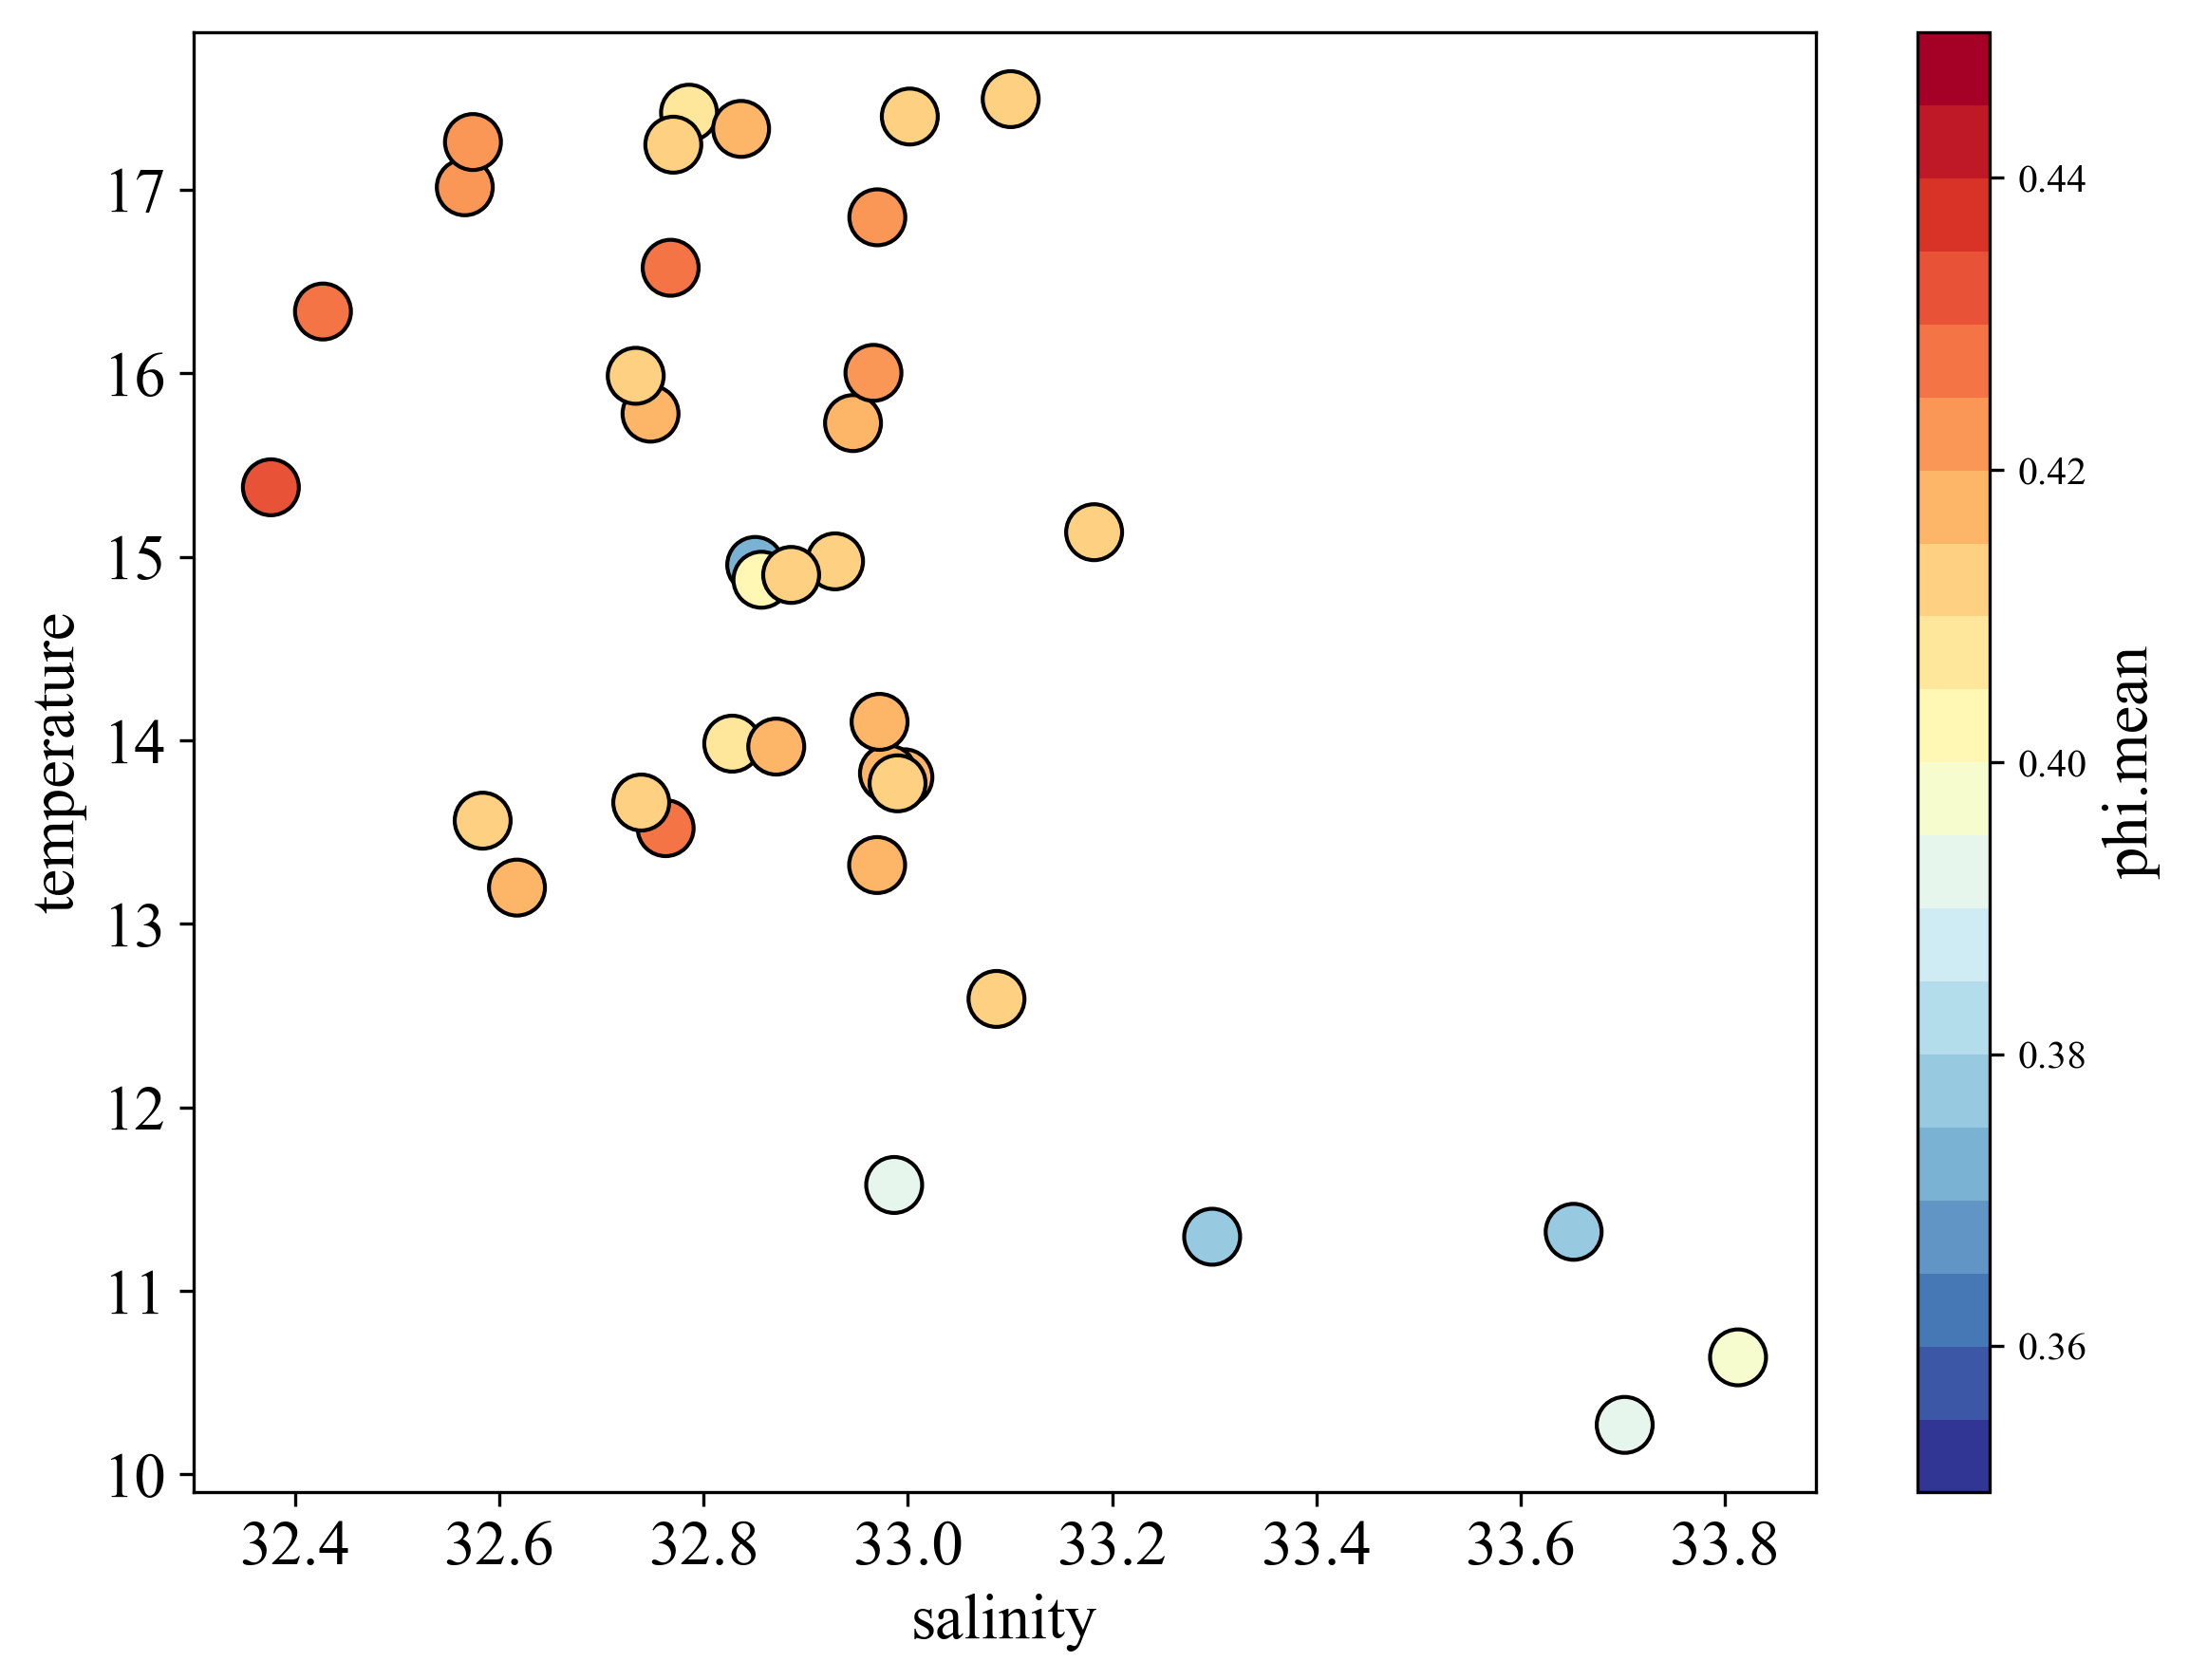

In [24]:
# join phi data to env df

data = pd.merge(env, phi, on = 'sample')

# depth range 
maxd = 10

# data = data[data['depth']<maxd]

fig1 = plt.figure(1, figsize=(8,6), dpi = 300)


palette = plt.get_cmap('RdYlBu_r', 20)
plt.scatter(data['S'],data['T'], s = 200, lw = 1, edgecolor = 'k',c = data['phi.mean'], alpha = 1, vmin=0.35, vmax = 0.45, zorder =1, cmap = palette)

# n = data['sample']
# for i, txt in enumerate(n):
#     plt.annotate(txt, (data['S'][i]-0.1,data['T'][i]+0.075), fontsize = 16, fontweight = 'bold')


cbar = plt.colorbar()
cbar.set_label('phi.mean', fontsize = 16)

plt.xlabel('salinity', fontsize = 16)
plt.ylabel('temperature', fontsize = 16)
plt.tick_params(axis='both', which='major', labelsize=16)

fig1.savefig('../figures/phi_TS.png', dpi = 300)

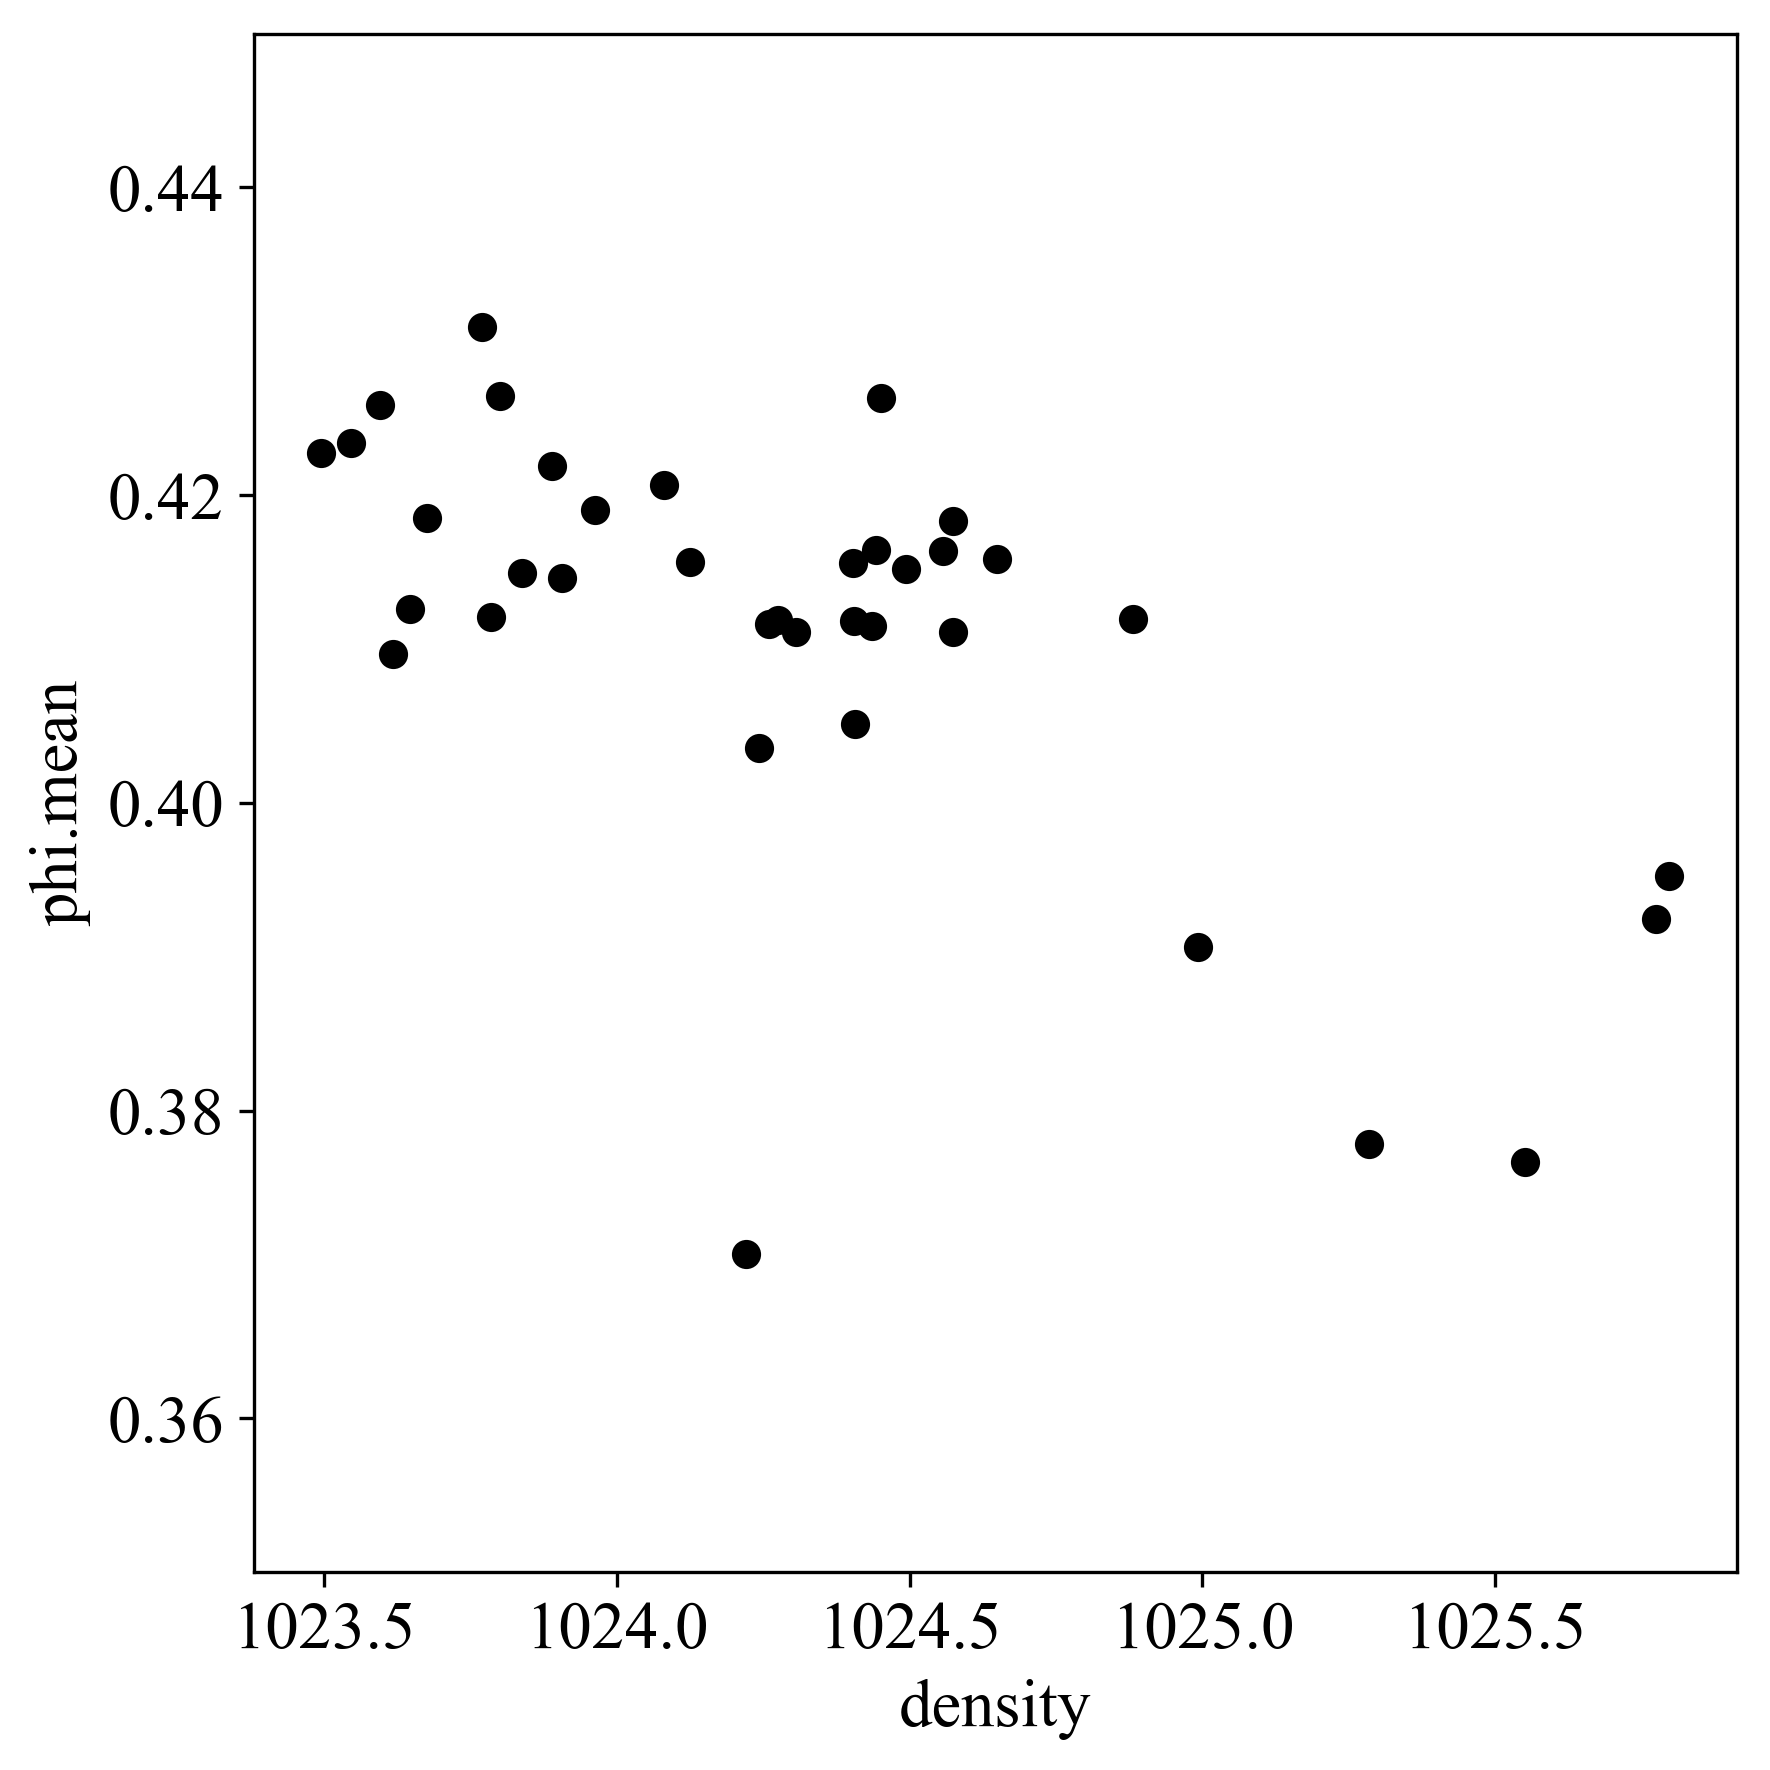

In [4]:
fig2 = plt.figure(2, figsize=(6,6), dpi = 300)


plt.plot(data['rho'], data['phi.mean'], 'ok')
# plt.axes([-128, -126, 0.35, 0.55])
# plt.xlim([-128, -122])
plt.ylim([0.35, 0.45])
plt.xlabel('density', fontsize = 16)
plt.ylabel('phi.mean', fontsize = 16)
plt.tick_params(axis='both', which='major', labelsize=16)

fig2.savefig('../figures/phi_rho.png', dpi = 300)

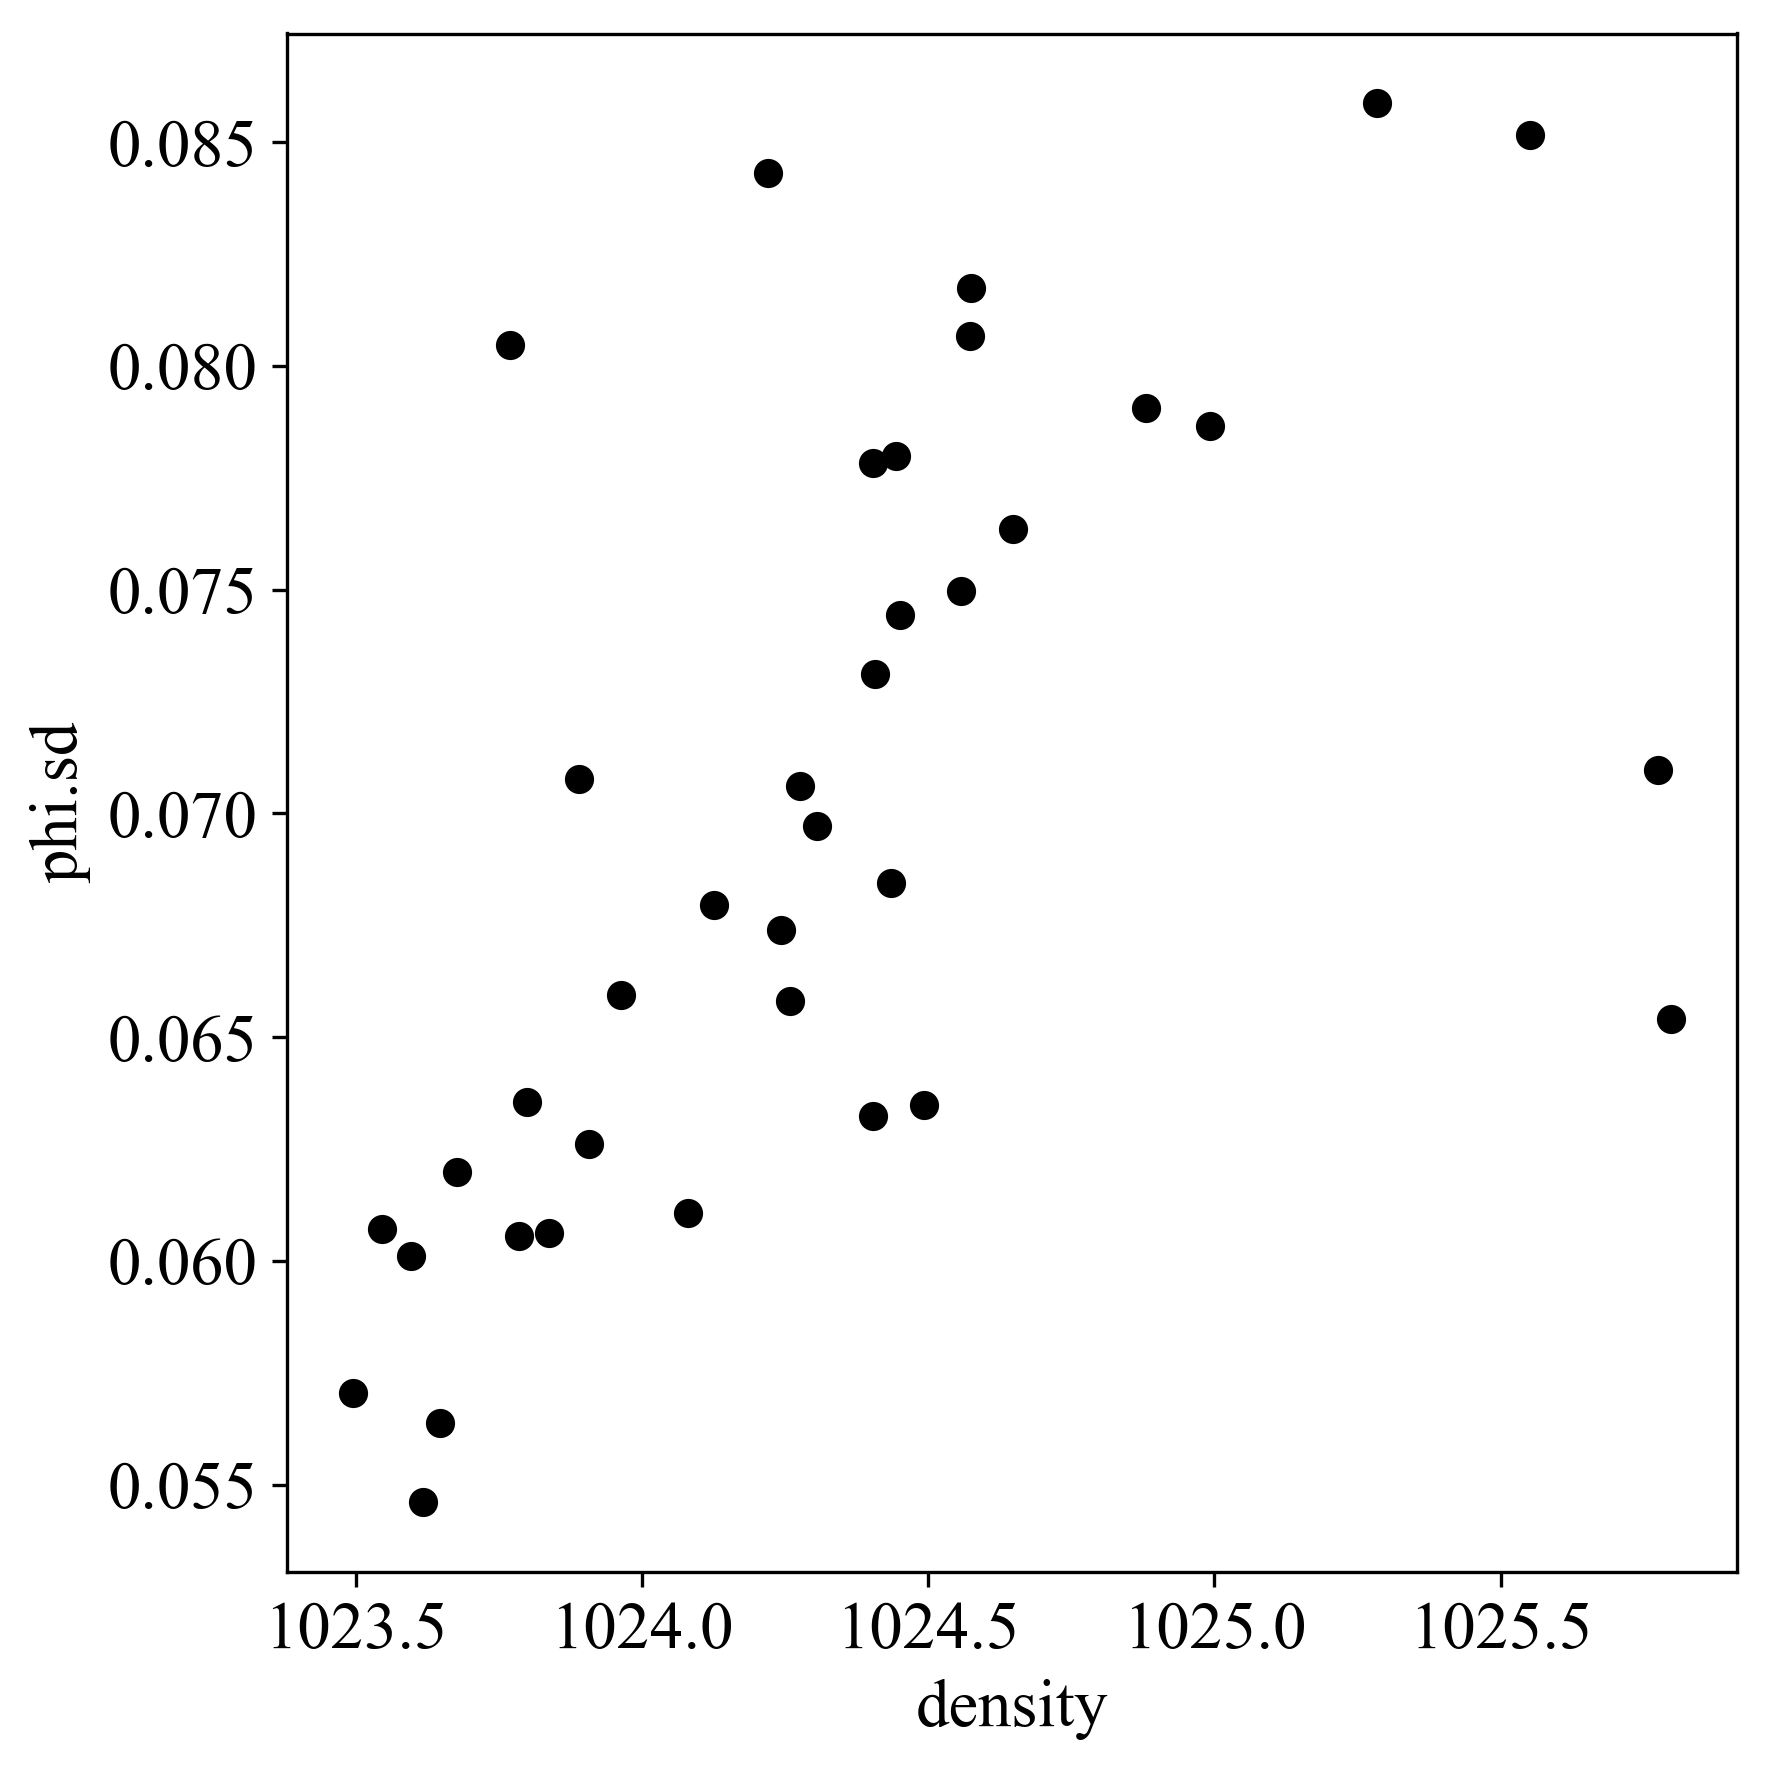

In [8]:
fig3 = plt.figure(3, figsize=(6,6), dpi = 300)


plt.plot(data['rho'], data['phi.sd'], 'ok')
# plt.axes([-128, -126, 0.35, 0.55])
# plt.xlim([-128, -122])
# plt.ylim([0.35, 0.45])
plt.xlabel('density', fontsize = 16)
plt.ylabel('phi.sd', fontsize = 16)
plt.tick_params(axis='both', which='major', labelsize=16)

fig3.savefig('../figures/phi.sd_rho.png', dpi = 300)